In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [4]:
data_display = pd.read_csv("dataset3_pd.csv")

data_display

,Datetime,WL1(mm),WL2(mm),WL3(mm),WL4 (mm),WL5 (mm),Solar (W/m2),AirTemp (DegC),RH (%),y
0,2019-08-27 5:00,53,208,87,36,44,0,21.9,97,-0.1
1,2019-08-27 11:00,59,62,93,36,50,113,22.3,100,-0.1
2,2019-08-27 15:00,60,61,93,36,56,152,22.8,100,-0.1
3,2019-08-27 16:00,58,60,91,36,51,141,23.3,100,-0.1
4,2019-08-27 17:00,57,61,91,36,48,123,23.6,99,-0.1
...,...,...,...,...,...,...,...,...,...,...
408,2019-10-06 21:00,39,42,42,36,44,0,14.5,93,-0.1
409,2019-10-07 0:00,39,42,42,36,44,0,13.9,99,-0.1
410,2019-10-07 2:00,39,42,42,36,44,0,14.4,100,-0.1
411,2019-10-07 5:00,39,42,42,36,44,0,14.6,98,-0.1


In [5]:
learning_rate = 0.001
trainning_steps = 15000
display_step = 1000

w_pred = 0

In [15]:
data = np.loadtxt("dataset3_np.csv", delimiter = ',', dtype = np.float32)

x_train = data[:300, [1]]
x_test = data[300:, [1]]

y_train = data[:300, [-1]]
y_test = data[300:, [-1]]

w = tf.Variable(random.random())
bias = tf.Variable(random.random())

In [16]:
def compute_loss():
    hypothesis = w * x_train + bias
    loss = tf.reduce_mean((y_train - hypothesis) ** 2)
    return loss

optimizer = tf.optimizers.Adam(lr = learning_rate)

for step in range(1, trainning_steps + 1):
    optimizer.minimize(compute_loss, var_list = [w, bias])
    
    if step % display_step == 0:
        print('step:', step, '\n', 'w:', w.numpy(), '\n', 'bias:', bias.numpy(), 
              '\n', 'loss:', compute_loss().numpy(), '\n')
        
        w_pred = w.numpy()

step: 1000 
 w: 0.031328782 
 bias: 0.13197328 
 loss: 3.399983 

step: 2000 
 w: -0.004522491 
 bias: 0.094624445 
 loss: 0.013971456 

step: 3000 
 w: -0.004544549 
 bias: 0.091887236 
 loss: 0.013888453 

step: 4000 
 w: -0.00445885 
 bias: 0.08744879 
 loss: 0.013775697 

step: 5000 
 w: -0.004320203 
 bias: 0.080268174 
 loss: 0.0135984775 

step: 6000 
 w: -0.0041014873 
 bias: 0.06894084 
 loss: 0.013332002 

step: 7000 
 w: -0.0037678203 
 bias: 0.051660094 
 loss: 0.012956321 

step: 8000 
 w: -0.0032846385 
 bias: 0.026635932 
 loss: 0.012478354 

step: 9000 
 w: -0.0026416173 
 bias: -0.006666397 
 loss: 0.01196348 

step: 10000 
 w: -0.0018959289 
 bias: -0.04528593 
 loss: 0.0115397135 

step: 11000 
 w: -0.0012044818 
 bias: -0.08109635 
 loss: 0.011313083 

step: 12000 
 w: -0.00075764913 
 bias: -0.1042381 
 loss: 0.011251751 

step: 13000 
 w: -0.0005955148 
 bias: -0.11263514 
 loss: 0.011246023 

step: 14000 
 w: -0.00057185977 
 bias: -0.11386025 
 loss: 0.011245924

In [21]:
line_x = np.arange(min(x_test), max(x_test), 0.01)
line_y = w * line_x + bias

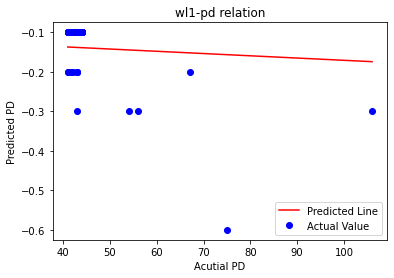

In [22]:
#plt.figure(figsize = (15, 5))

plt.plot(line_x, line_y, 'r-', label = 'Predicted Line')
plt.plot(x_test, y_test, 'bo', label = 'Actual Value')
plt.title('wl1-pd relation')
plt.xlabel('Acutial PD')
plt.ylabel('Predicted PD')
plt.legend(loc = 'lower right')
plt.show()

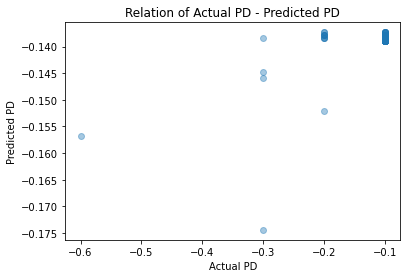

In [23]:
# 실제 담수심과 예상 담수심 간 관계.

y_hat = w_pred * x_test + bias

plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [24]:
def rmse(x_test, y_test):
    y_hat = w_pred * x_test + bias
    error = y_hat - y_test
    mse = np.mean(error * error)
    rmse = np.sqrt(mse)
    
    return rmse

print(rmse(x_test, y_test))

0.06426968
